In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
X=pd.read_csv("data/kaggle_1_train.csv")
Y=pd.read_csv("data/kaggle_1_test.csv")
X.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [114]:
Y.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [115]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [116]:
mean=X.groupby("Sex").mean()
mean.Age['female']
mean.Age['male']
mean_y=Y.groupby("Sex").mean()
mean_y.Age['female']
mean_y.Age['male']

30.27273170731707

In [117]:
X['Age'][X['Sex']=='female']=X['Age'][X['Sex']=='female'].fillna(mean.Age['female'])
X['Age'][X['Sex']=='male']=X['Age'][X['Sex']=='male'].fillna(mean.Age['male'])
X['Embarked']=X['Embarked'].fillna("S")
Y['Age'][Y['Sex']=='female']=Y['Age'][Y['Sex']=='female'].fillna(mean_y.Age['female'])
Y['Age'][Y['Sex']=='male']=Y['Age'][Y['Sex']=='male'].fillna(mean_y.Age['male'])
Y['Embarked']=Y['Embarked'].fillna("S")

C:\Users\RAVI KUMAR RUNGTA\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\RAVI KUMAR RUNGTA\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\RAVI KUMAR RUNGTA\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removi

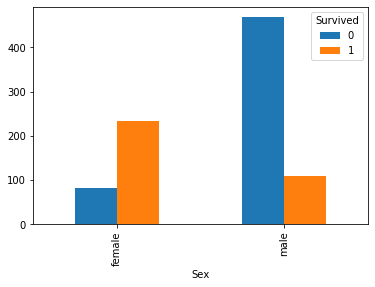

In [118]:
pd.crosstab(X.Sex,X.Survived).plot(kind='bar')

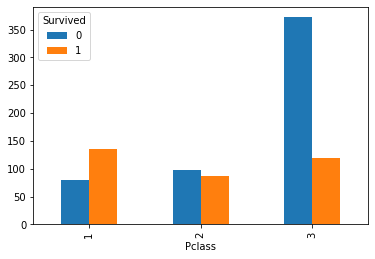

In [119]:
pd.crosstab(X.Pclass,X.Survived).plot(kind='bar')

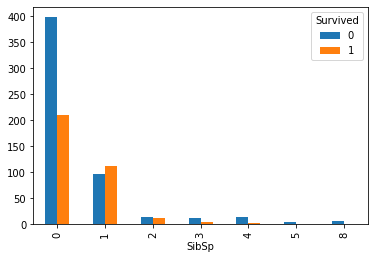

In [120]:
pd.crosstab(X.SibSp,X.Survived).plot(kind='bar')

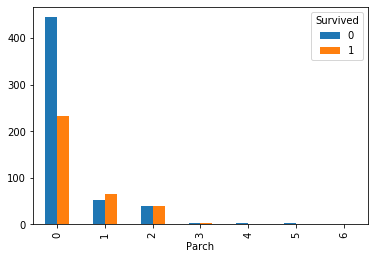

In [121]:
pd.crosstab(X.Parch,X.Survived).plot(kind='bar')

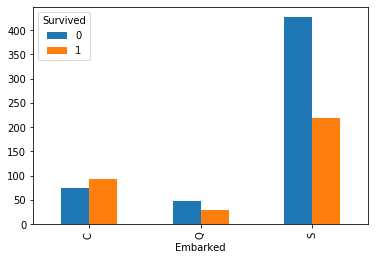

In [122]:

pd.crosstab(X.Embarked,X.Survived).plot(kind='bar')

In [123]:
train = X[['Pclass','Age','SibSp','Parch']]
train_y=Y[['Pclass','Age','SibSp','Parch']]


In [124]:
Sex_dummies = pd.get_dummies(X.Sex, prefix="Sex")
Embarked= pd.get_dummies(X.Embarked, prefix="Embarked")
Sex_dummies_y = pd.get_dummies(Y.Sex, prefix="Sex")
Embarked_y= pd.get_dummies(Y.Embarked, prefix="Embarked")

In [125]:
train=pd.concat([train,Sex_dummies],axis='columns')
train=pd.concat([train,Embarked],axis='columns')
train.head()
train_y=pd.concat([train_y,Sex_dummies_y],axis='columns')
train_y=pd.concat([train_y,Embarked_y],axis='columns')
train_y.head()

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,0,1,0,1,0
1,3,47.0,1,0,1,0,0,0,1
2,2,62.0,0,0,0,1,0,1,0
3,3,27.0,0,0,0,1,0,0,1
4,3,22.0,1,1,1,0,0,0,1


In [126]:
train_=X['Survived']

In [196]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train,train_)

In [197]:
from sklearn.linear_model import LogisticRegression
res=LogisticRegression()
res.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [198]:
y_pred=res.predict(X_test)

In [207]:
res.score(X_test,y_test)

0.8026905829596412

In [200]:
error=y_pred-y_test
error.head()
error[error !=0 ].count()

44

In [201]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.84       136
           1       0.78      0.69      0.73        87

    accuracy                           0.80       223
   macro avg       0.80      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223



In [202]:
y_pred_test=res.predict(train_y)

In [203]:
Y['Survived']=y_pred_test

In [204]:
output =Y[['PassengerId','Survived']]

In [174]:
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [175]:
output.to_csv("data/Output_Kaggle_1.csv",index=False)